# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | jacareacanga
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | felanitx
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | midland
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | ila
Processing Record 15 of Set 1 | toora-khem
Processing Record 16 of Set 1 | shahrud
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | kirakira
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,14.92,77,75,7.72,AU,1682379746
1,jacareacanga,-6.2222,-57.7528,23.26,97,98,0.25,BR,1682380486
2,bluff,-46.6000,168.3333,11.56,80,97,15.75,NZ,1682380487
3,provideniya,64.3833,-173.3000,-4.80,54,0,12.07,RU,1682380487
4,rikitea,-23.1203,-134.9692,26.16,85,64,6.53,PF,1682380487


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,14.92,77,75,7.72,AU,1682379746
1,jacareacanga,-6.2222,-57.7528,23.26,97,98,0.25,BR,1682380486
2,bluff,-46.6000,168.3333,11.56,80,97,15.75,NZ,1682380487
3,provideniya,64.3833,-173.3000,-4.80,54,0,12.07,RU,1682380487
4,rikitea,-23.1203,-134.9692,26.16,85,64,6.53,PF,1682380487


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

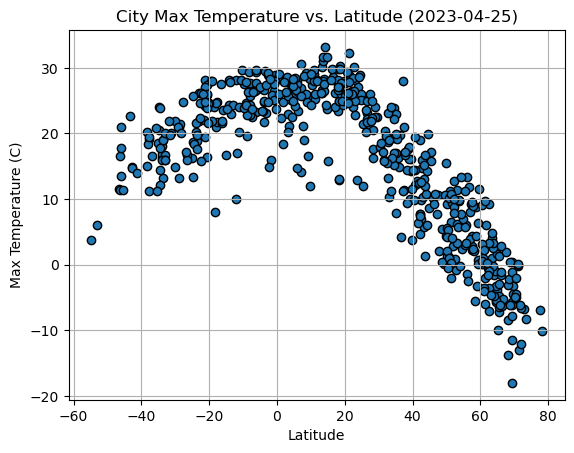

<Figure size 640x480 with 0 Axes>

In [83]:
# Build scatter plot for latitude vs. temperature
y_axis = city_data_df["Max Temp"]
x_axis = city_data_df["Lat"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

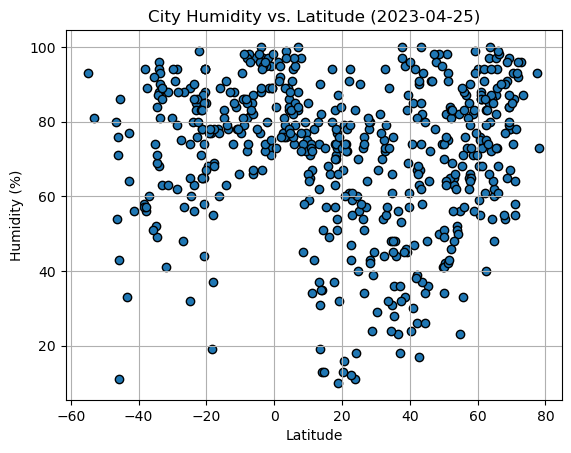

<Figure size 640x480 with 0 Axes>

In [84]:
# Build the scatter plots for latitude vs. humidity
y_axis = city_data_df["Humidity"]
x_axis = city_data_df["Lat"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

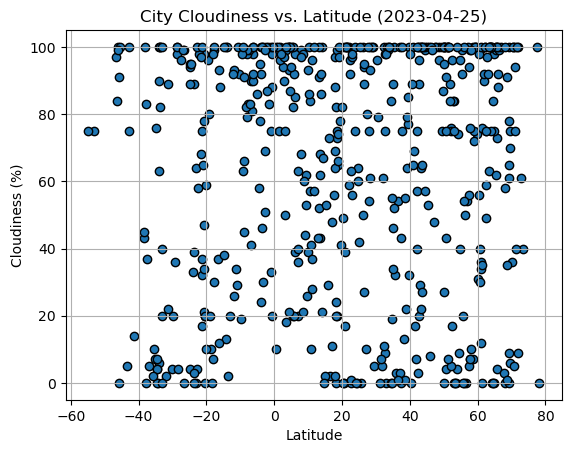

<Figure size 640x480 with 0 Axes>

In [85]:
# Build the scatter plots for latitude vs. cloudiness
y_axis = city_data_df["Cloudiness"]
x_axis = city_data_df["Lat"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

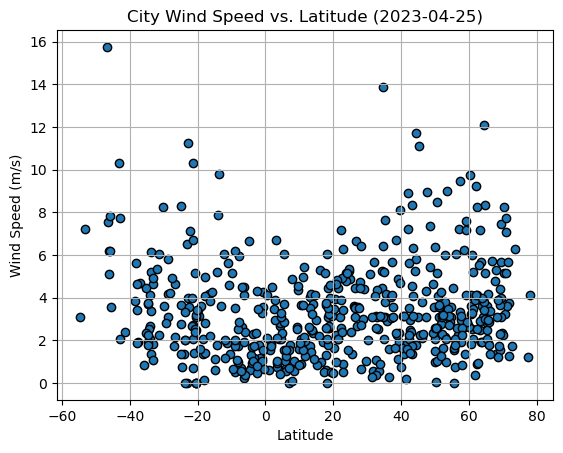

<Figure size 640x480 with 0 Axes>

In [86]:
# Build the scatter plots for latitude vs. wind speed
y_axis = city_data_df["Wind Speed"]
x_axis = city_data_df["Lat"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude (2023-04-25)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int

In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,provideniya,64.3833,-173.3000,-4.80,54,0,12.07,RU,1682380487
5,felanitx,39.4696,3.1483,16.09,87,77,2.34,ES,1682380488
6,longyearbyen,78.2186,15.6401,-10.09,73,0,4.12,SJ,1682380488
10,midland,31.9974,-102.0779,20.45,54,61,5.66,US,1682380489
11,kodiak,57.7900,-152.4072,2.27,66,7,3.04,US,1682380490


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,14.92,77,75,7.72,AU,1682379746
1,jacareacanga,-6.2222,-57.7528,23.26,97,98,0.25,BR,1682380486
2,bluff,-46.6000,168.3333,11.56,80,97,15.75,NZ,1682380487
4,rikitea,-23.1203,-134.9692,26.16,85,64,6.53,PF,1682380487
7,busselton,-33.6500,115.3333,13.24,81,100,6.14,AU,1682380489


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8261343513262166


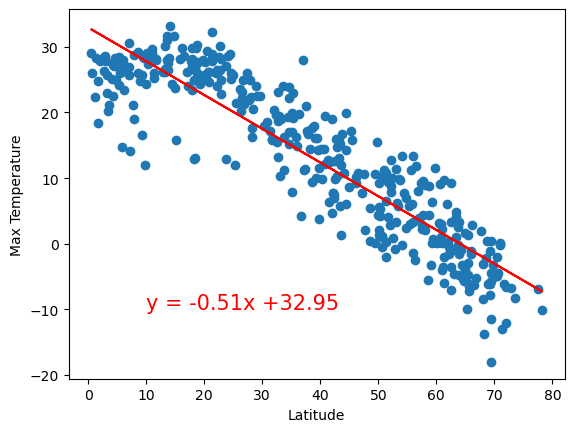

In [90]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots

y_axis = northern_hemi_df["Max Temp"]
x_axis = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.4736989340578298


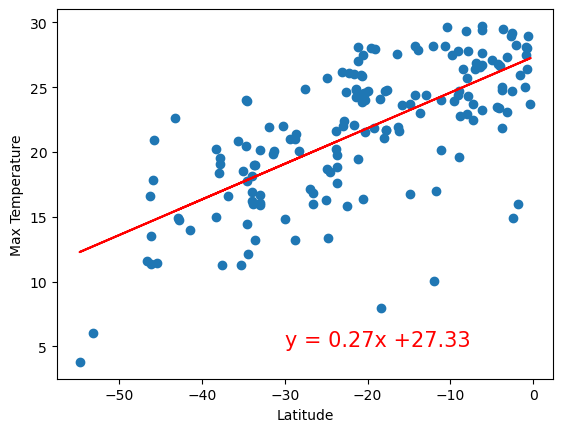

In [91]:
# Linear regression on Southern Hemisphere
y_axis = southern_hemi_df["Max Temp"]
x_axis = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship:

As seen from the two plots which compare the maximum temperature vs. latitude for the Southern and Northern hemisphere, it can be concluded that there is a clear relationship as defined by the linear trend line. For the Northern hemisphere, as the latitude increases (go further North), the maximum temperature decreases - an inverse relationship. With a r-value of about 82%, the linear trendline is a good indication of the data. The gradient of the linear curve also indicates a significant relationship. Whereas, for the Souther hemisphere, as the latitide decreases (go further South), the maximum temperature decreases - a direct relationship. With a r-value of about 47%, the linear trendline will pass as an indication of the relationship. The gradient of the linear curve also indicates a significant relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.013332284636032293


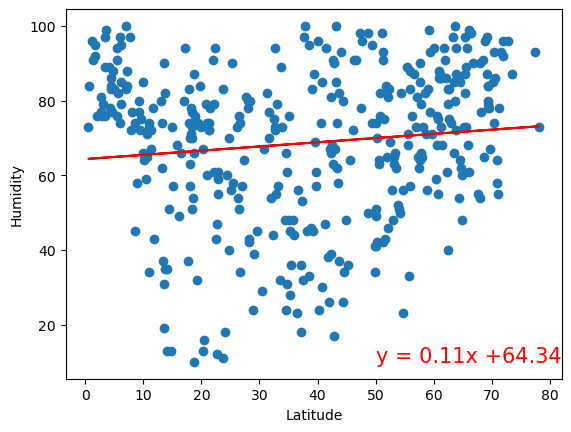

In [92]:
# Northern Hemisphere
y_axis = northern_hemi_df["Humidity"]
x_axis = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.11594209586250519


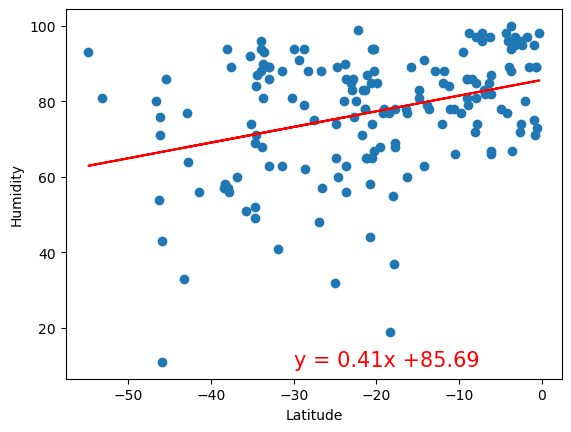

In [93]:
# Southern Hemisphere
y_axis = southern_hemi_df["Humidity"]
x_axis = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship:

As seen from the two plots which compare the humidity vs. latitude for the Southern and Northern hemisphere, the r-values are less than 15%. Hence, the trendlines are a poor indication of the data set. A loose conclusion can be made, by referring to both scatter plots for the respective hemispheres and their linear fits, that as the latitude increases, the humidity increases which represents a direct relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00016707007583977566


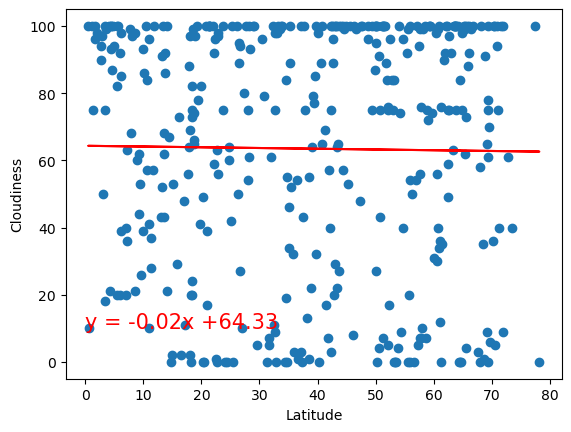

In [99]:
# Northern Hemisphere
y_axis = northern_hemi_df["Cloudiness"]
x_axis = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.051896138098389784


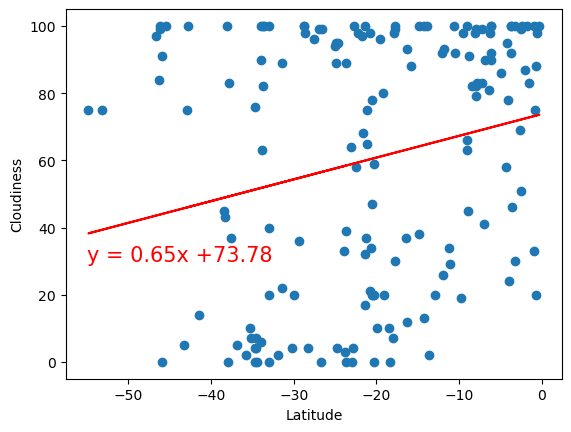

In [101]:
# Southern Hemisphere
y_axis = southern_hemi_df["Cloudiness"]
x_axis = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship:

As seen from the two plots which compare the cloudiness vs. latitude for the Southern and Northern hemisphere, the r-values are less than 10%. Hence, the trendlines are a poor indication of the data set. An extremely loose conclusion can be made, by referring to both scatter plots for the respective hemispheres and their linear fits, that as the latitude increases, the cloudiness increases which represents a direct relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05205156871092334


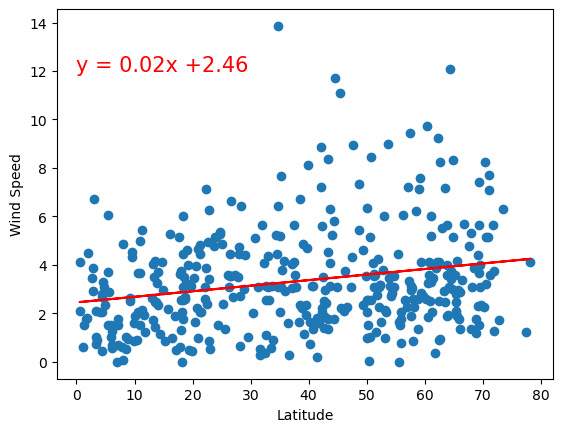

In [102]:
# Northern Hemisphere
y_axis = northern_hemi_df["Wind Speed"]
x_axis = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.13951586713822417


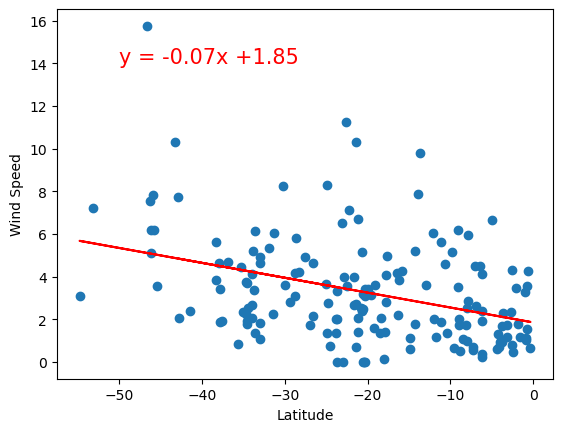

In [97]:
# Southern Hemisphere
y_axis = southern_hemi_df["Wind Speed"]
x_axis = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot

plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,14),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship:

As seen from the two plots which compare the wind speed vs. latitude for the Southern and Northern hemisphere, it can be concluded that there is a vague relationship as defined by the linear trend line. For the Northern hemisphere, as the latitude increases (go further North), the wind speed increases - a direct relationship. With a r-value of less than 10%, the linear trendline isn't a good indication of the data. The gradient of the linear curve also indicates an insignificant relationship. Whereas, for the Souther hemisphere, as the latitide decreases (go further South), the wind speed increases - an inverse relationship. With a r-value of about 14%, the linear trendline isn't a good indication of the relationship. The gradient of the linear curve also indicates an insignificant relationship.